In [1]:
#Imprt the Libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Load the data
from google.colab import files
files.upload()


Saving Google_test_data.csv to Google_test_data.csv


{'Google_test_data.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2018-08-13,1236.979980,1249.272949,1233.640991,1235.010010,1235.010010,997300\n2018-08-14,1235.189941,1245.869995,1225.109985,1242.099976,1242.099976,1348100\n2018-08-15,1229.260010,1235.239990,1209.510010,1214.380005,1214.380005,1828800\n2018-08-16,1224.729980,1226.000000,1202.550049,1206.489990,1206.489990,1343200\n2018-08-17,1202.030029,1209.020020,1188.239990,1200.959961,1200.959961,1389600\n2018-08-20,1205.020020,1211.000000,1194.625977,1207.770020,1207.770020,870800\n2018-08-21,1208.000000,1217.260010,1200.354004,1201.619995,1201.619995,1205600\n2018-08-22,1200.000000,1211.839966,1199.000000,1207.329956,1207.329956,887400\n2018-08-23,1207.140015,1221.280029,1204.239990,1205.380005,1205.380005,992600\n2018-08-24,1208.819946,1221.650024,1206.359009,1220.650024,1220.650024,946600\n2018-08-27,1227.599976,1243.089966,1225.715942,1241.819946,1241.819946,1156300\n2018-08-28,1241.290039,1242.545044,1228.689941,1231.150

In [4]:
#Store the data
df=pd.read_csv('Google_test_data.csv')

In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-13,1236.979980,1249.272949,1233.640991,1235.010010,1235.010010,997300
1,2018-08-14,1235.189941,1245.869995,1225.109985,1242.099976,1242.099976,1348100
2,2018-08-15,1229.260010,1235.239990,1209.510010,1214.380005,1214.380005,1828800
3,2018-08-16,1224.729980,1226.000000,1202.550049,1206.489990,1206.489990,1343200
4,2018-08-17,1202.030029,1209.020020,1188.239990,1200.959961,1200.959961,1389600
...,...,...,...,...,...,...,...
247,2019-08-07,1156.000000,1178.444946,1149.624023,1173.989990,1173.989990,1444300
248,2019-08-08,1182.829956,1205.010010,1173.020020,1204.800049,1204.800049,1468000
249,2019-08-09,1197.989990,1203.880005,1183.603027,1188.010010,1188.010010,1065700
250,2019-08-12,1179.209961,1184.959961,1167.671997,1174.709961,1174.709961,1003000


In [7]:
#Show and store the last row of data
actual_price=df.tail(1)

In [8]:
#Show the dta
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
251,2019-08-13,1171.459961,1204.5896,1171.459961,1197.27002,1197.27002,1318009


In [10]:
#Get all of the data except the last row
df=df.head(len(df)-1)
#Shw the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-13,1236.979980,1249.272949,1233.640991,1235.010010,1235.010010,997300
1,2018-08-14,1235.189941,1245.869995,1225.109985,1242.099976,1242.099976,1348100
2,2018-08-15,1229.260010,1235.239990,1209.510010,1214.380005,1214.380005,1828800
3,2018-08-16,1224.729980,1226.000000,1202.550049,1206.489990,1206.489990,1343200
4,2018-08-17,1202.030029,1209.020020,1188.239990,1200.959961,1200.959961,1389600
...,...,...,...,...,...,...,...
245,2019-08-05,1170.040039,1175.239990,1140.140015,1152.319946,1152.319946,2597500
246,2019-08-06,1163.310059,1179.959961,1160.000000,1169.949951,1169.949951,1709400
247,2019-08-07,1156.000000,1178.444946,1149.624023,1173.989990,1173.989990,1444300
248,2019-08-08,1182.829956,1205.010010,1173.020020,1204.800049,1204.800049,1468000


In [11]:
#Create empty list
days = list()
adj_close_prices = list()


In [12]:
#Getting only the date and the adjucted close prices
df_days= df.loc[:,'Date']
df_adj_close = df.loc[ :,'Adj Close']

In [14]:
#Create the independent data set (dates)
for day in df_days:
  days.append([int(day.split('-')[2])])
#Create the dependent data set (adj close prices)
for adj_close_price in df_adj_close:
  adj_close_prices.append(float(adj_close_price))

In [15]:
#Show the days
days

[[13],
 [14],
 [15],
 [16],
 [17],
 [20],
 [21],
 [22],
 [23],
 [24],
 [27],
 [28],
 [29],
 [30],
 [31],
 [4],
 [5],
 [6],
 [7],
 [10],
 [11],
 [12],
 [13],
 [14],
 [17],
 [18],
 [19],
 [20],
 [21],
 [24],
 [25],
 [26],
 [27],
 [28],
 [1],
 [2],
 [3],
 [4],
 [5],
 [8],
 [9],
 [10],
 [11],
 [12],
 [15],
 [16],
 [17],
 [18],
 [19],
 [22],
 [23],
 [24],
 [25],
 [26],
 [29],
 [30],
 [31],
 [1],
 [2],
 [5],
 [6],
 [7],
 [8],
 [9],
 [12],
 [13],
 [14],
 [15],
 [16],
 [19],
 [20],
 [21],
 [23],
 [26],
 [27],
 [28],
 [29],
 [30],
 [3],
 [4],
 [6],
 [7],
 [10],
 [11],
 [12],
 [13],
 [14],
 [17],
 [18],
 [19],
 [20],
 [21],
 [24],
 [26],
 [27],
 [28],
 [31],
 [2],
 [3],
 [4],
 [7],
 [8],
 [9],
 [10],
 [11],
 [14],
 [15],
 [16],
 [17],
 [18],
 [22],
 [23],
 [24],
 [25],
 [28],
 [29],
 [30],
 [31],
 [1],
 [4],
 [5],
 [6],
 [7],
 [8],
 [11],
 [12],
 [13],
 [14],
 [15],
 [19],
 [20],
 [21],
 [22],
 [25],
 [26],
 [27],
 [28],
 [1],
 [4],
 [5],
 [6],
 [7],
 [8],
 [11],
 [12],
 [13],
 [14],
 [15],
 [18

In [16]:
#Show the adj close prices
adj_close_prices

[1235.01001,
 1242.099976,
 1214.380005,
 1206.48999,
 1200.959961,
 1207.77002,
 1201.619995,
 1207.329956,
 1205.380005,
 1220.650024,
 1241.819946,
 1231.150024,
 1249.300049,
 1239.119995,
 1218.189941,
 1197.0,
 1186.47998,
 1171.439941,
 1164.829956,
 1164.640015,
 1177.359985,
 1162.819946,
 1175.329956,
 1172.530029,
 1156.050049,
 1161.219971,
 1171.089966,
 1186.869995,
 1166.089966,
 1173.369995,
 1184.650024,
 1180.48999,
 1194.640015,
 1193.469971,
 1195.310059,
 1200.109985,
 1202.949951,
 1168.189941,
 1157.349976,
 1148.969971,
 1138.819946,
 1081.219971,
 1079.319946,
 1110.079956,
 1092.25,
 1121.280029,
 1115.689941,
 1087.969971,
 1096.459961,
 1101.160034,
 1103.689941,
 1050.709961,
 1095.569946,
 1071.469971,
 1020.080017,
 1036.209961,
 1076.77002,
 1070.0,
 1057.790039,
 1040.089966,
 1055.810059,
 1093.390015,
 1082.400024,
 1066.150024,
 1038.630005,
 1036.050049,
 1043.660034,
 1064.709961,
 1061.48999,
 1020.0,
 1025.76001,
 1037.609985,
 1023.880005,
 1048

In [18]:
#Create 3 models
lin_svr = SVR(kernel='linear' , C = 1000.0)
lin_svr.fit(days, adj_close_prices)

poly_svr = SVR(kernel='poly' , C = 1000.0 , degree=2)
poly_svr.fit(days, adj_close_prices)

rbf_svr = SVR(kernel='rbf' , C = 1000.0 , gamma=0.85)
rbf_svr.fit(days, adj_close_prices)


SVR(C=1000.0, gamma=0.85)

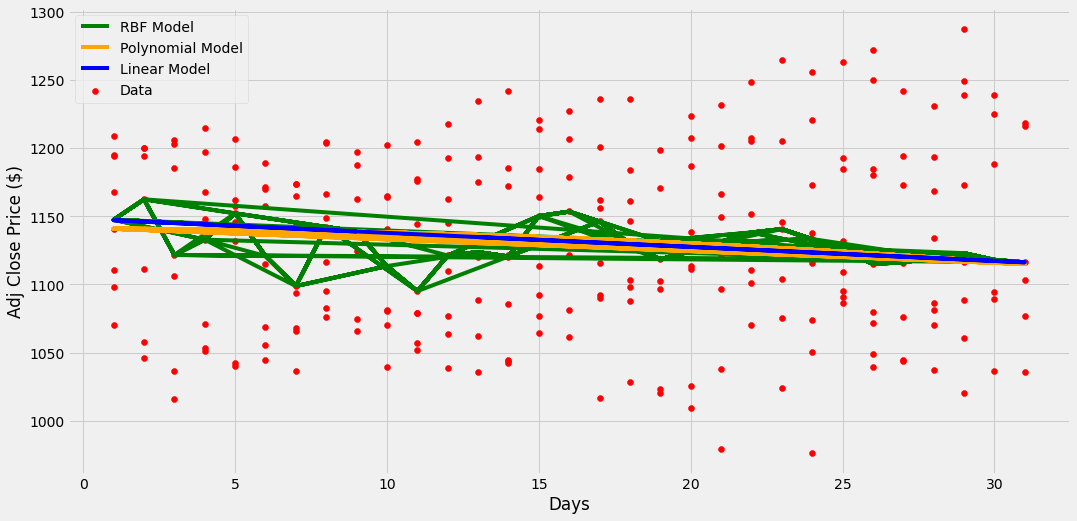

In [20]:
#Plot the models
plt.figure(figsize=(16,8))
plt.scatter(days,adj_close_prices, color = 'red' , label = 'Data')
plt.plot(days,rbf_svr.predict(days), color = 'green' , label = 'RBF Model')
plt.plot(days,poly_svr.predict(days), color = 'orange' , label = 'Polynomial Model')
plt.plot(days,lin_svr.predict(days), color = 'blue' , label = 'Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price ($)')
plt.legend()
plt.show()


In [29]:
#Show the predicted price for the given day
day = [[21]]
print('The RBF SVR predicted price:',rbf_svr.predict(day))
print('The Linear SVR predicted price:',lin_svr.predict(day))
print('The Polynomial SVR predicted price:',poly_svr.predict(day))

The RBF SVR predicted price: [1130.96895392]
The Linear SVR predicted price: [1126.56542727]
The Polynomial SVR predicted price: [1129.04808046]


In [30]:
#Show the actual price 
print('The Actual Price:', actual_price['Adj Close'][251])


The Actual Price: 1197.27002
